## Calcul des performances et des matrices de confusion avec scikit-learn

* Complétez le notebook

In [1]:
import os
import pandas as pd

### Cas 1 : classification binaire : les ligands actifs ou inactifs sur CDC4
 * https://en.wikipedia.org/wiki/Cell_division_control_protein_4

#### Lecture des données
* Les données sont dans le fichier CDC4.csv fourni sur ecampus
* La partition Entraînement/Test est déjà faite sur ces données

In [4]:
def data_loading(target_directory, target_filename):
    target_address = os.path.join(target_directory,target_filename)
    data =  pd.read_csv(target_address, sep='\t')
    targets = data.iloc[:, 1]
    descriptions = data.iloc[:, 4:]
    training_descriptions = descriptions.loc[data['training/test set'] == 'training']
    test_descriptions =  descriptions.loc[data['training/test set'] == 'test']
    training_targets = targets.loc[data['training/test set'] == 'training']
    test_targets =  targets.loc[data['training/test set'] == 'test']
    return(training_descriptions, test_descriptions,training_targets, test_targets)

In [5]:
(training_descriptions, test_descriptions,training_targets, test_targets) =\
data_loading("./DonneesCDC4","CDC4.csv")

##### Appréhension des données
* Accéder à une donnée
* Données les dimensions des trames des échantillons d'apprentissage et de test

In [6]:
display(training_descriptions)

,MinAbsPartialCharge,NumRadicalElectrons,HeavyAtomMolWt,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MinPartialCharge,ExactMolWt,MolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.163204,0.0,304.293,4.712992,0.364542,4.712992,-0.364542,318.093917,318.405,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.323558,0.0,390.319,13.009941,0.496764,13.009941,-0.496764,405.089560,405.439,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.278556,0.0,433.321,13.647662,0.338197,13.647662,-0.338197,455.186987,455.497,170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.230801,0.0,290.217,5.446311,0.453595,5.446311,-0.453595,305.116427,305.337,114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.278329,0.0,330.242,13.223167,0.376358,13.223167,-0.376358,351.169525,351.410,134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,0.270250,0.0,258.176,12.072978,0.376358,12.072978,-0.376358,275.138225,275.312,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325,0.229319,0.0,378.308,11.489740,0.367667,11.489740,-0.367667,399.136511,399.476,146.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1328,0.252832,0.0,390.297,12.124998,0.496743,12.124998,-0.496743,415.200825,415.497,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1330,0.252832,0.0,378.286,12.117207,0.378793,12.117207,-0.378793,405.216475,405.502,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
display(test_descriptions)

,MinAbsPartialCharge,NumRadicalElectrons,HeavyAtomMolWt,MaxAbsEStateIndex,MaxAbsPartialCharge,MaxEStateIndex,MinPartialCharge,ExactMolWt,MolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
1,0.216434,0.0,290.221,10.935117,0.367667,10.935117,-0.367667,307.143310,307.357,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.136856,0.0,340.257,5.402057,0.496745,5.402057,-0.496745,364.189926,364.449,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.278583,0.0,424.360,13.587801,0.496768,13.587801,-0.496768,448.168145,448.552,164.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21,0.278411,0.0,380.282,13.648067,0.376358,13.648067,-0.376358,404.196074,404.474,154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.161118,0.0,302.228,5.365676,0.496743,5.365676,-0.496743,321.147727,321.380,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,0.365061,0.0,323.258,13.110820,0.416564,13.110820,-0.365061,335.070403,335.354,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1326,0.270504,0.0,314.265,12.258071,0.377774,12.258071,-0.377774,329.094646,329.385,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1327,0.164878,0.0,286.229,5.149728,0.471841,5.149728,-0.471841,301.121512,301.349,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1329,0.129722,0.0,238.185,5.057252,0.471904,5.057252,-0.471904,251.105862,251.289,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print("le jeu d'apprentissage : ",training_descriptions.shape)
print("le jeu de test : ",test_descriptions.shape)

le jeu d'apprentissage :  (1062, 196)
le jeu de test :  (271, 196)


### Un arbre de décision avec Scikit Learn¶

In [9]:
import sklearn.tree as dt

* Documentation à https://scikit-learn.org/dev/modules/tree.html#tree

* Initialisez un arbre de décision avant apprentissage.

In [10]:
DT_CDC4 = dt.DecisionTreeClassifier()

* Entrainez l'arbre avec les données d'apprentissage.

In [11]:
DT_CDC4.fit(training_descriptions, training_targets)

DecisionTreeClassifier()

* Utilisez l'arbre précedent pour prédire la valeur d'activité du premier exemple du jeu de test.

In [13]:
y_perd = DT_CDC4.predict(test_descriptions)

#### Visualisation de l'arbre

In [14]:
list_of_the_attributes = list(training_descriptions.columns.values)
print("%s"%(list_of_the_attributes))

['MinAbsPartialCharge', 'NumRadicalElectrons', 'HeavyAtomMolWt', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MinPartialCharge', 'ExactMolWt', 'MolWt', 'NumValenceElectrons', 'MinEStateIndex', 'MinAbsEStateIndex', 'MaxPartialCharge', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'ES

* Si votre arbre s'appelle DT1, l'instruction suivante crée un fichier DOT représentant l'arbre.

In [19]:
dt.export_graphviz(DT1,out_file="cdc4_tree.dot",\
                   feature_names=list_of_the_attributes,\
                   class_names=["Active","Inactive"],
                  rounded=True, filled=True)

Ensuite, on peut convertir el fichier "dot" en fichier image au format souahité grace au programme dot du paquet graphviz :
`dot -Tpng cdc2_tree.dot -o cdc2_tree.png`

### La mesure des performances
* Aide des différentes mesures proposées :
https://scikit-learn.org/dev/modules/model_evaluation.html#classification-metrics

In [15]:
import sklearn.metrics as mt

#### Le taux de bonnes prédictions
* Indiquez le taux de bonnes prédictions à associer au classifieur construit.

In [19]:
print("Score de classifieur : ",mt.accuracy_score(y_perd,test_targets))

Score de classifieur :  0.7712177121771218


#### La matrice de confusion
* Indiquez la matrice de confusion associée.

In [21]:
mt.confusion_matrix(y_perd,test_targets)

array([[ 53,  27],
       [ 35, 156]])

Pour représenter la matrice de confusion :
* une aide à : https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

* Pour choisir la couleur :
https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [ ]:
mt.ConfusionMatrixDisplay.from_predictions(DT_CDC4 ,y_perd,test_targets) 

## glass : un cas de classification non binaire
* Ici un cas de classification non binaire (6 classes différentes).

In [28]:
DS_Glass = pd.read_csv("./DonneesGlass/glass.csv")

### Partitionner en échantillon de test / échantillon d'apprentissage
* Dans le cas de glass, la partition n'est pas donnée à l'avance.
* Grâce à la méthode split de model_selection, partitionnez le jeu de données en deux : un échantillon d'apprentissage rassemblant 75\% des exemples et un jeu de test rassemblant ... 25 \% des données.

In [27]:
import sklearn.model_selection as ms

* Pour réaliser une partition "simple" du jeu de données en jeu d'entrainement/jeu de test :
il y a train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [29]:
(glass_train,glass_test)= 

* Séparez la description de la cible.

In [31]:
glass_train_descriptions = 
glass_train_targets = 
glass_test_descriptions = 
glass_test_targets = 

#### Un arbre de décision à partir du jeu d'apprentissage
* de manière similaire à l'exemple précédent, faites un arbre de décision, faites un image

DecisionTreeClassifier()

7


#### Le taux de bonnes performances
* Indiquez le taux de bonnes performances de l'arbre

Les performances sont 0.9815 


#### La matrice de confusion

* Représentation de la matrice de confusion avec la fonction inspirée de : https://stackoverflow.com/questions/71574168/how-to-plot-confusion-matrix-without-color-coding

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
def plot_confusion_matrix(cm, classes, title,
                          normalize=False,
                          file='confusion_matrix',
                          cmap='gray_r',
                          linecolor='k'):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_title = 'Confusion matrix, with normalization'
    else:
        cm_title = title

    fmt = '.3f' if normalize else 'd'
    sns.heatmap(cm, fmt=fmt, annot=True, square=True,
                yticklabels=classes, #xticklabels=classes,
                cmap=cmap, vmin=0, vmax=0,
                linewidths=0.5, linecolor=linecolor,
                cbar=False)
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title(cm_title)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
    plt.savefig(f'{file}.png')

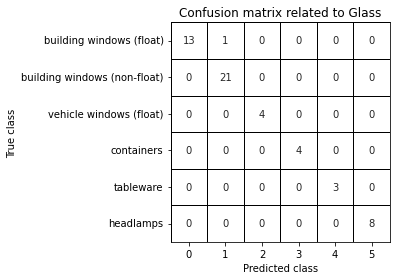